In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import functions.func as f
import graphs.data_visualization as data_viz

In [2]:
#Spremanje inputa

vremenski_period = 12
mjesecne_kolicine = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]
trosak_pripreme = 500
trosak_skladistenja = 1
trosak_proizvodnje = 3



In [3]:
# Izrada tablice za prikaz potražnje kroz vrijeme

data = f.quantities_table(mjesecne_kolicine, vremenski_period)

data


,period,forecast
0,1,200
1,2,150
2,3,100
3,4,50
4,5,50
5,6,100
6,7,150
7,8,200
8,9,200
9,10,250


In [4]:
# Izrada nove tablice u kojoj radimo izračun
data_calc = data.copy()

for i in data_calc['period'].unique():
    data_calc['Order {}'.format(i)] = 0

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,0,0,0,0,0,0,0,0,0,0,0,0
1,2,150,0,0,0,0,0,0,0,0,0,0,0,0
2,3,100,0,0,0,0,0,0,0,0,0,0,0,0
3,4,50,0,0,0,0,0,0,0,0,0,0,0,0
4,5,50,0,0,0,0,0,0,0,0,0,0,0,0
5,6,100,0,0,0,0,0,0,0,0,0,0,0,0
6,7,150,0,0,0,0,0,0,0,0,0,0,0,0
7,8,200,0,0,0,0,0,0,0,0,0,0,0,0
8,9,200,0,0,0,0,0,0,0,0,0,0,0,0
9,10,250,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
# Računanje mogućih troškova za prvi mjesec - Wagner-Within metoda
data_calc = f.first_order(trosak_pripreme, trosak_skladistenja, data_calc)

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,500,0,0,0,0,0,0,0,0,0,0,0
1,2,150,650,0,0,0,0,0,0,0,0,0,0,0
2,3,100,850,0,0,0,0,0,0,0,0,0,0,0
3,4,50,1000,0,0,0,0,0,0,0,0,0,0,0
4,5,50,1200,0,0,0,0,0,0,0,0,0,0,0
5,6,100,1700,0,0,0,0,0,0,0,0,0,0,0
6,7,150,2600,0,0,0,0,0,0,0,0,0,0,0
7,8,200,4000,0,0,0,0,0,0,0,0,0,0,0
8,9,200,5600,0,0,0,0,0,0,0,0,0,0,0
9,10,250,7850,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Računanje mogućih troškova za sve ostale mjesece - Wagner-Within metoda
data_calc = f.other_orders(trosak_pripreme, trosak_skladistenja, data_calc, vremenski_period)

data_calc

,period,forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,500,0,0,0,0,0,0,0,0,0,0,0
1,2,150,650,1000,0,0,0,0,0,0,0,0,0,0
2,3,100,850,1100,1150,0,0,0,0,0,0,0,0,0
3,4,50,1000,1200,1200,1350,0,0,0,0,0,0,0,0
4,5,50,1200,1350,1300,1400,1500,0,0,0,0,0,0,0
5,6,100,1700,1750,1600,1600,1600,1700,0,0,0,0,0,0
6,7,150,2600,2500,2200,2050,1900,1850,2100,0,0,0,0,0
7,8,200,4000,3700,3200,2850,2500,2250,2300,2350,0,0,0,0
8,9,200,5600,5100,4400,3850,3300,2850,2700,2550,2750,0,0,0
9,10,250,7850,7100,6150,5350,4550,3850,3450,3050,3000,3050,0,0


In [7]:
# Transponiramo tablicu za lakšu vizualizaciju
data_calc = data_calc.set_index('period').drop(['forecast'], axis = 1).T

data_calc

period,1,2,3,4,5,6,7,8,9,10,11,12
Order 1,500,650,850,1000,1200,1700,2600,4000,5600,7850,10850,13600
Order 2,0,1000,1100,1200,1350,1750,2500,3700,5100,7100,9800,12300
Order 3,0,0,1150,1200,1300,1600,2200,3200,4400,6150,8550,10800
Order 4,0,0,0,1350,1400,1600,2050,2850,3850,5350,7450,9450
Order 5,0,0,0,0,1500,1600,1900,2500,3300,4550,6350,8100
Order 6,0,0,0,0,0,1700,1850,2250,2850,3850,5350,6850
Order 7,0,0,0,0,0,0,2100,2300,2700,3450,4650,5900
Order 8,0,0,0,0,0,0,0,2350,2550,3050,3950,4950
Order 9,0,0,0,0,0,0,0,0,2750,3000,3600,4350
Order 10,0,0,0,0,0,0,0,0,0,3050,3350,3850


In [8]:
# Pronalazak optimalnog plana proizvodnje
# Idemo unazad kroz tablicu i tražimo put s najmanjim troškovima - Wagner-Within metoda
df_results = f.backward(vremenski_period, data, data_calc)

df_results

,initial,nexts,cost,quantity
backward,,,,
1,12,11,3750,550
2,10,9,3000,450
3,8,6,2250,450
4,5,1,1200,550


In [9]:
# IOH = Inventory on hold

results_final = f.calculation(trosak_pripreme, trosak_skladistenja, trosak_proizvodnje, df_results, data)
results_final

,period,forecast,production,IOH,Holding Cost,Set-Up Costs,Holding + Set-Up,Total Cost
0,1,200,550,350,350,500,850,2500
1,2,150,0,200,200,0,200,200
2,3,100,0,100,100,0,100,100
3,4,50,0,50,50,0,50,50
4,5,50,0,0,0,0,0,0
5,6,100,450,350,350,500,850,2200
6,7,150,0,200,200,0,200,200
7,8,200,0,0,0,0,0,0
8,9,200,450,250,250,500,750,2100
9,10,250,0,0,0,0,0,0


In [10]:
ukupan_trosak = results_final['Total Cost'].sum()

print("Ukupan trošak je {}e".format(ukupan_trosak))

Ukupan trošak je 9750e


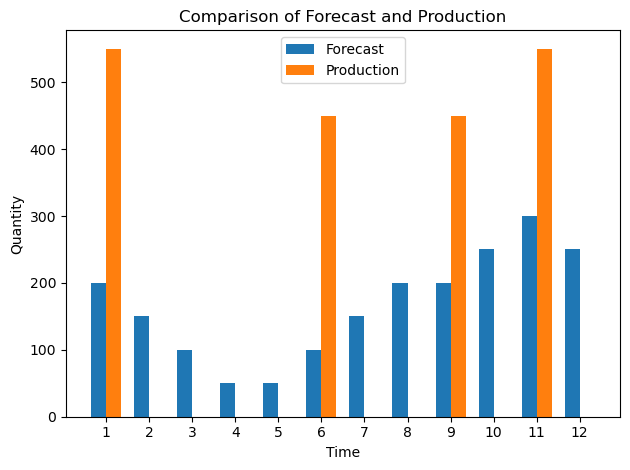

In [11]:
# Graf koji prikazuje tražene količine za isporuku i proizvedene količine
data_viz.forecast_and_production(results_final)


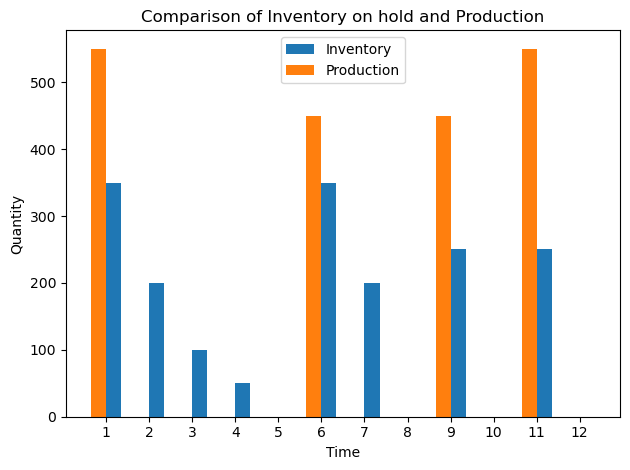

In [12]:
# Graf koji prikazuje zalihe i proizvedene količine
data_viz.inventory_and_production(results_final)

In [13]:
# Tablica za usporedbu troškova
usporedba_troskova = f.cost_comparison(trosak_pripreme, trosak_proizvodnje, trosak_skladistenja, vremenski_period, results_final)
usporedba_troskova

,standardni troskovi,optimalni troskovi,mjesecna usteda
1,1100,2500,-1400
2,2050,2700,-650
3,2850,2800,50
4,3500,2850,650
5,4150,2850,1300
6,4950,5050,-100
7,5900,5250,650
8,7000,5250,1750
9,8100,7350,750
10,9350,7350,2000


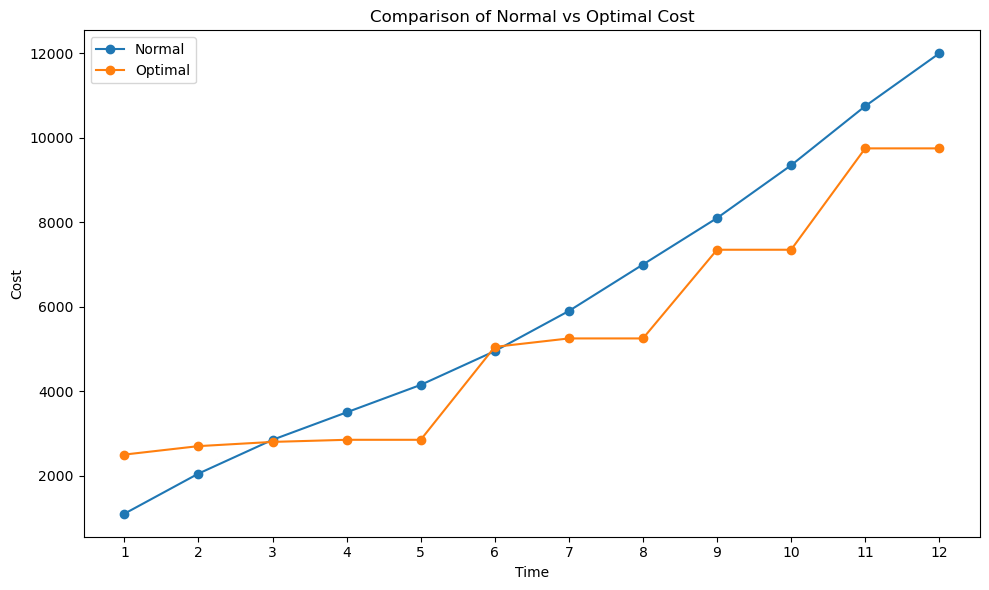

In [14]:
# Graf koji prikazuje akumulaciju troškova kroz vrijeme
data_viz.normal_vs_optimal_costs(usporedba_troskova)

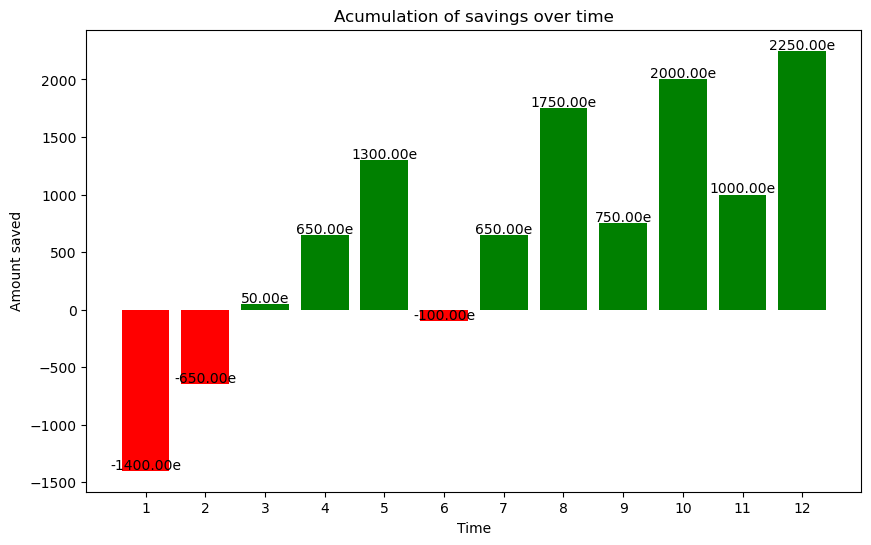

In [15]:
# Graf koji prikazuje akumulaciju uštede kroz vrijeme
data_viz.savings(usporedba_troskova)

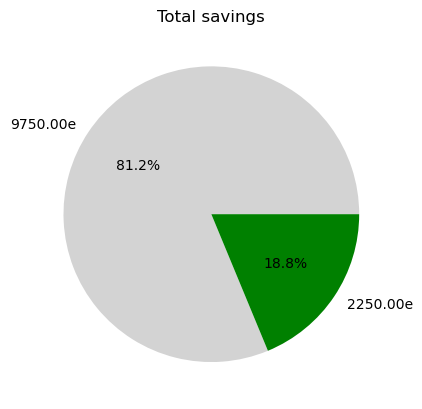

In [16]:
# Graf koji prikazuje postotak uštede
data_viz.usteda(usporedba_troskova['optimalni troskovi'].iloc[-1], usporedba_troskova['mjesecna usteda'].iloc[-1])